In [80]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [8]:
data = pd.read_csv("./lab1_kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"3129100520,""20141011T000000"",221900,1,1,1180,5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"6414100192,""20141209T000000"",518000,1,2.25,253...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"5611500400,""20150225T000000"",180000,2,1,330,10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2483200835,""20141209T000000"",604000,4,1,1960,5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1954400510,""20150218T000000"",510000,1,2,1680,8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,"0261000018,""20140521T000000"",160000,1,2.5,1510...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21609,"6600060120,""20150221T000000"",400000,4,2.5,2110...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21610,"1521100141,""20140621T000000"",402101,2,0.35,102...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21611,"0291110100,""20150116T000000"",400000,1,2.5,1600...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data["id"]

0        3129100520,"20141011T000000",221900,1,1,1180,5...
1        6414100192,"20141209T000000",518000,1,2.25,253...
2        5611500400,"20150225T000000",180000,2,1,330,10...
3        2483200835,"20141209T000000",604000,4,1,1960,5...
4        1954400510,"20150218T000000",510000,1,2,1680,8...
                               ...                        
21608    0261000018,"20140521T000000",160000,1,2.5,1510...
21609    6600060120,"20150221T000000",400000,4,2.5,2110...
21610    1521100141,"20140621T000000",402101,2,0.35,102...
21611    0291110100,"20150116T000000",400000,1,2.5,1600...
21612    1521100153,"20141015T000000",125000,2,0.35,102...
Name: id, Length: 21613, dtype: object

In [72]:
# data[data.columns] = data["id"].str.split(",", expand=True)
data["floors"] = data["floors"].str.strip("\"").astype(float)

In [73]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3129100520,"""20141011T000000""",221900,1,1,1180,5650,1.0,0,0,...,3,1180,0,1955,0,"""98138""",43.5112,-122.253,1140,5650
1,6414100192,"""20141209T000000""",518000,1,2.25,2530,3242,2.0,0,0,...,3,2130,400,1951,1991,"""98125""",43.321,-122.119,1690,3619
2,5611500400,"""20150225T000000""",180000,2,1,330,10000,1.0,0,0,...,6,330,0,1911,0,"""98028""",43.3139,-122.211,2320,8062
3,2483200835,"""20141209T000000""",604000,4,1,1960,5000,1.0,0,0,...,3,1050,910,1965,0,"""98116""",43.5208,-122.191,1160,5000
4,1954400510,"""20150218T000000""",510000,1,2,1680,8080,1.0,0,0,...,8,1680,0,1983,0,"""98034""",43.6168,-122.045,1800,3501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0261000018,"""20140521T000000""",160000,1,2.5,1510,1111,1.0,0,0,...,8,1510,0,2009,0,"""98101""",43.6991,-122.146,1510,1509
21609,6600060120,"""20150221T000000""",400000,4,2.5,2110,5811,2.0,0,0,...,8,2110,0,2014,0,"""98146""",43.5103,-122.162,1810,3200
21610,1521100141,"""20140621T000000""",402101,2,0.35,1020,1150,2.0,0,0,...,3,1020,0,2009,0,"""98144""",43.5944,-122.299,1020,2003
21611,0291110100,"""20150116T000000""",400000,1,2.5,1600,2188,2.0,0,0,...,8,1600,0,2004,0,"""98023""",43.5145,-122.069,1410,1283


In [74]:
data.to_csv("./new_data.csv", index=False)

In [75]:
df = pd.read_csv("./new_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3129100520,"""20141011T000000""",221900.0,1,1.00,1180,5650,1.0,0,0,...,3,1180,0,1955,0,"""98138""",43.5112,-122.253,1140,5650
1,6414100192,"""20141209T000000""",518000.0,1,2.25,2530,3242,2.0,0,0,...,3,2130,400,1951,1991,"""98125""",43.3210,-122.119,1690,3619
2,5611500400,"""20150225T000000""",180000.0,2,1.00,330,10000,1.0,0,0,...,6,330,0,1911,0,"""98028""",43.3139,-122.211,2320,8062
3,2483200835,"""20141209T000000""",604000.0,4,1.00,1960,5000,1.0,0,0,...,3,1050,910,1965,0,"""98116""",43.5208,-122.191,1160,5000
4,1954400510,"""20150218T000000""",510000.0,1,2.00,1680,8080,1.0,0,0,...,8,1680,0,1983,0,"""98034""",43.6168,-122.045,1800,3501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,261000018,"""20140521T000000""",160000.0,1,2.50,1510,1111,1.0,0,0,...,8,1510,0,2009,0,"""98101""",43.6991,-122.146,1510,1509
21609,6600060120,"""20150221T000000""",400000.0,4,2.50,2110,5811,2.0,0,0,...,8,2110,0,2014,0,"""98146""",43.5103,-122.162,1810,3200
21610,1521100141,"""20140621T000000""",402101.0,2,0.35,1020,1150,2.0,0,0,...,3,1020,0,2009,0,"""98144""",43.5944,-122.299,1020,2003
21611,291110100,"""20150116T000000""",400000.0,1,2.50,1600,2188,2.0,0,0,...,8,1600,0,2004,0,"""98023""",43.5145,-122.069,1410,1283


In [88]:
#Q2
df.drop(columns=["id"]).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.614789e+05,2.453708,1.825117,1795.588997,1.339868e+04,1.436844,0.007542,0.187110,2.111044,5.993245,1575.615139,263.959145,1965.647805,84.271411,43.458217,-122.136991,1768.962337,11275.732383
std,3.614423e+05,1.567013,0.697594,807.134712,3.895503e+04,0.478981,0.086517,0.646798,1.548457,2.727498,702.327531,422.150486,31.889791,401.067057,0.174264,0.126814,584.403697,25505.743302
min,3.500000e+04,0.000000,0.000000,130.000000,3.000000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,130.000000,0.000000,1900.000000,0.000000,43.100100,-122.519000,199.000000,348.000000
25%,2.100000e+05,1.000000,1.350000,1210.000000,3.861000e+03,1.000000,0.000000,0.000000,1.000000,3.000000,1120.000000,0.000000,1939.000000,0.000000,43.320600,-122.196000,1316.000000,3950.000000
50%,4.125000e+05,2.000000,2.000000,1620.000000,6.320000e+03,1.000000,0.000000,0.000000,1.000000,6.000000,1410.000000,0.000000,1963.000000,0.000000,43.511100,-122.145000,1630.000000,6181.000000
75%,5.800000e+05,4.000000,2.500000,2160.000000,1.053100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1960.000000,450.000000,1996.000000,0.000000,43.610800,-122.108000,2126.000000,10080.000000
max,6.885000e+06,11.000000,8.000000,12050.000000,1.651159e+06,2.500000,1.000000,4.000000,5.000000,12.000000,9410.000000,4820.000000,2015.000000,2015.000000,43.699900,-121.115000,6210.000000,858112.000000


In [50]:
# Q3
df["floors"].value_counts().to_frame()


,floors
"""1""",11293
"""2""",8241
"""1.5""",1918
"""2.5""",161


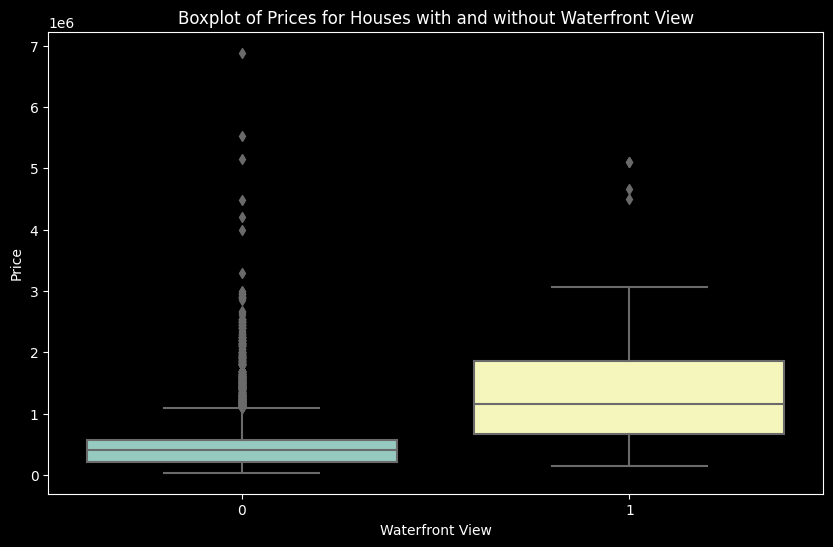

In [63]:
# Q4
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)

plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Boxplot of Prices for Houses with and without Waterfront View')
plt.show()

<Axes: xlabel='sqft_above', ylabel='price'>

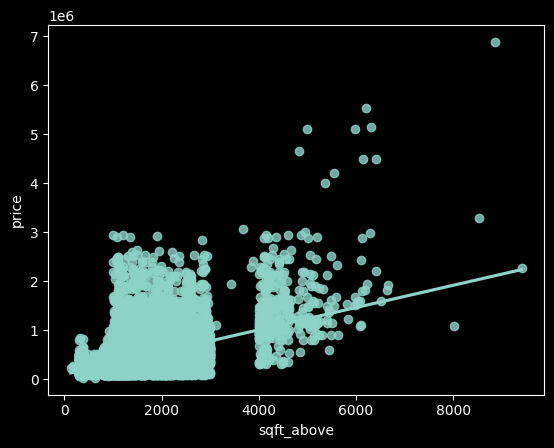

In [57]:
#Q5
sns.regplot(x="sqft_above", y="price", data=df, ci=None)

In [60]:
# Q6
X1 = df[["sqft_living"]]
Y1 = df["price"]
lm = LinearRegression()
lm.fit(X1, Y1)
lm.score(X1, Y1)

0.2345904300960039

In [82]:
# Q7
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df["price"]
lm = LinearRegression()
lm.fit(X, y)
lm.score(X, y)

0.47661685515862506

In [84]:
# Q8
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [85]:
# Q9
from sklearn.pipeline import Pipeline
pipeline = Pipeline(Input)

pipeline.fit(df[features], y)
pipeline.score(df[features], y)

0.6201283734150476

In [87]:
# Q10
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X, y)
ridge.score(X, y)

0.4766168414769867

In [99]:
# Q11
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
pf = PolynomialFeatures()
X_train_transform = pf.fit_transform(X_train)
X_test_transform = pf.fit_transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_transform, y_train)
ridge.score(X_test_transform, y_test)

/home/ledinhnguyen/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.4023e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.6019408550313163